In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('Data/automobile2.csv')

# Exploratory Data Analysis (EDA)
It is an approach to analyze data in order to:
1. summarize main charateristics of the data to gain better understanding of the dataset.
2. uncover relationships between different variables
3. extract important variables for the problems we are trying to solve.

# 1. Descriptive Statistics
* Describe basic features of data
* Giving short summaries about the sample and measures of the data.
* One way in which we can do this is by using the `describe()` method in pandas.
* Using the `describe()` function and applying it, automatically computes basic statistics for all numerical variables.
* Any NaN vaules are automatically skipped in these statistics.
* for categorical values, one way we can summarize it is by using the function `value_counts()`.

In [12]:
drive_wheels_counts = df['drive-wheels'].value_counts()
drive_wheels_counts

drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

* `Box plot` are a great way to visualize numeric data since we can visualize the various distribution of the data.
* The main feature that the box plot shows are: 
    1. The `median` of the data, which represents where the middle datapoint is.
    2. The `upper-quartile` shows where the 75th percentile is.
    3. The `lower quartile` shows where the 25th percentile is.
    4. Next we have the `lower-extremes` and `upper-extremes`. These are calculated as 1.5 times the inter-quartile range (IQR) above and below `75th` and `25th` percentile respectively.
    5. Finally `box plots` also display `outliers` as individulal dots that occurs outside the upper and lower extremes.

<Axes: xlabel='drive-wheels', ylabel='price'>

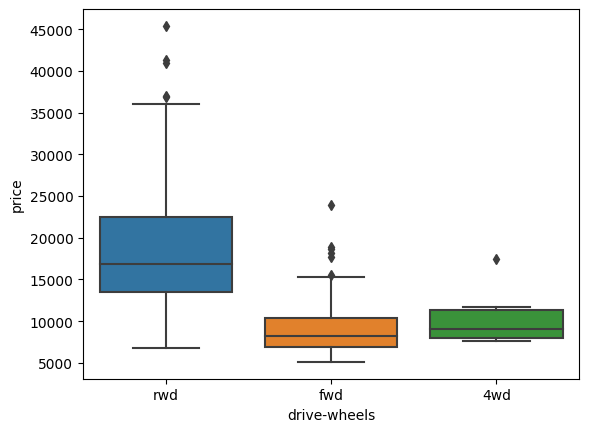

In [13]:
import seaborn as sns
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)

We can see that the distribution of price between the rwd (rear-wheel drive) and fwd (forward-wheel drive) and othe categories are distinct, but the price for fwd (forward-wheel drive) are almost indistinguishable.

* Often times we tend to see continuous variables in our data. These data points are numbers contained in some range. 
* For example: 
    1. In out dataset, price and enigne-size are continuous variables. What if we want to know what the distribution the relationship between these two columns?
    2. One way to visualize this is by using `scatter plots`.
    3. Each observation in a scatter plot is represented as a point. 
    4. This plot shows the relationship between two variables:
        * The `predictor variable` is plotted on the `x-axis`.
        * The `target variable` is plotted on the `y-axis`.
    5. In a scatter plot, we typically set the predictor variable on the x-axis or horizontal axis and we set the target variable on the y-axis or vertical axis.
    * We are using the Matplotlib functioon `scatter()` using taking in x and a y variables. 

Text(0, 0.5, 'Price')

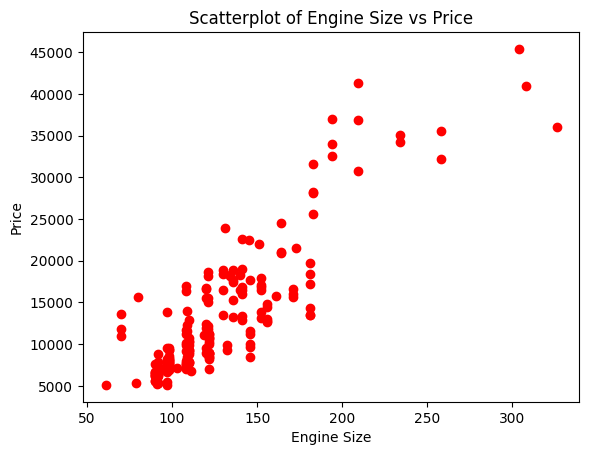

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df['engine-size'], df['price'], color='red')
plt.title('Scatterplot of Engine Size vs Price') # Add a title to the scatterplot
plt.xlabel('Engine Size') # Add x-label to the scatterplot
plt.ylabel('Price') # Add y-label to the scatterplot

# Group By Data In Python
## Grouping Data
* Assume we want to know:
    1. Is there any relationship between tehe differnt types of `drive-system`.
    2. If so, which type of `drive-system` adds the most value to a vehicle.

* It would be nice if we could group all data by the different types of drive wheels, and compare the results of these different drive wheels against each other.
* In pandas this can be done using `group-by()` method.
* The `group-by()` method is used on categorical variables, groups the data into subset according to the different categories of that variables.

In [15]:
df_test = df[['drive-wheels', 'body-style', 'price']] #pick out the values we are interested in
df_grp = df_test.groupby(['drive-wheels', 'body-style'], as_index=False).mean() #we group the reduced data accroding to the 'drive-wheel' and'body-style'
#Since we are interested in knowing, how the average price differs accross he boards, we can take the maen of each group and append this bit at the very ed of the above line.
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


* We can see that according to our data, `rear-wheel-drive` `convertible` and `rear-wheel-drive` `hardtop` have the highest value, while the `four-wheel-drive` `hatchbacks` have the lowest.
* A table of ths form isn't the easiest to read, and also not very easy to visualize. 
* To make it easier to understand, we can convert this table into a `pivot table` using `pivot()` method.
* A `pivot table` is like an Excel spreadsheet, with one variable along the column and another along the row.

In [16]:
df_pivot = df_grp.pivot(index='drive-wheels', columns='body-style') #we can convert the above table into a pivot table
df_pivot

price                                             
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333  \
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

* The price data now becoms the rectangular grid which is easier to understand.
* Another way to represent the `pivot table` is by using `heat map` which puts different colors in the cells to represent the value.
* `HeatMap` takes a rectangular grid of data and assigns a color intensity based on the data value at the grid points.
* It is a great way to plot the target variable over multiple variables and through this get visual clues of the relationship between these variables and the target.

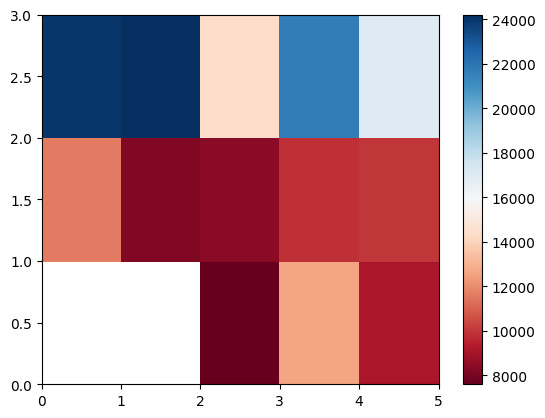

In [17]:
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

# Analysis of Variance (ANOVA)
* Assume, that we want to anlysze a categorical variable and see the correlation among different categories. 
* To analyze categorical variabele such the `make` variable, we can use a method such as `ANOVA` method.
* `ANOVA` is a statistical method used to test whether there are significant differences between the means of two or more groups.
* `ANOVA` can be used to find the correlation between different groups of a categorical variable.
* The `ANOVA` test returns two values:
    1. `F-test score`: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.
    2. `P-value`: P-value tells how statistically significant is our calculated score value.
* To implement `ANOVA` test:
    1. First we extract the `make` and `price` data.
    2. Then we will group the data by different makes.
    3. The `ANOVA` test can be performed in python usig the `f_oneway()` function in the `stats` module in the `scipy` library.
    4. The `f_oneway()` function takes the groups we want to compare as input and returns `F-test score` and `P-value`.
    5. We then pass in the data of the two car make groups we want to compare and it calculates the `ANOVA` results.
    5. If the `P-value` is less than a certain `significance level` (in this case 0.05), we can reject the null hypothesis and say that the `alternative hypothesis` is true.
    6. If the `P-value` is larger than the `significance level`, we can accept the null hypothesis and say that `null hypothesis` is true.
    7. If we get a large `F-test score` and a small `P-value`, we can reject the null hypothesis and say that the `alternative hypothesis` is true.
    8. If we get a small `F-test score` and a large `P-value`, we cannot reject the null hypothesis and cannot say that the `alternative hypothesis` is true.

In [18]:
from scipy import stats
df_anova = df[['make', 'price']]
grouped_anova = df_anova.groupby(['make'])
anova_results_1 = stats.f_oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('subaru')['price'])
anova_results_2 = stats.f_oneway(grouped_anova.get_group('honda')['price'], grouped_anova.get_group('jaguar')['price'])

In [19]:
print(f"Anova result: {anova_results_1}")
print(f"Anova Result: {anova_results_2}")

Anova result: F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)
Anova Result: F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077865e-11)


The results confirm what we guessed at first. The price between `honda` and `subaru` is not significantly different, while the price between `jaguar` and `honda` or `jaguar` and `subaru` is significantly different.
* All in all, we can say that there is a strong correlation between a categorical variable and other variables if `ANOVA` test gives us a large `F-test` value and a small `P-value`.

# Correlation
* `Correation` is a statistical metric for measuring to what extent different variables are interdependent.
* It is important to know that `correlation` doesn't imply `causation`.
* In other words, `Correlation` is a measure of how two variables change together, but it doesn't tell us about the cause and effect relationship between the two variables. 
* To see the coorelation we will visulaize it using `scatter plot` and add a linear line called a `regression line` between them.

(0.0, 53174.02454274377)

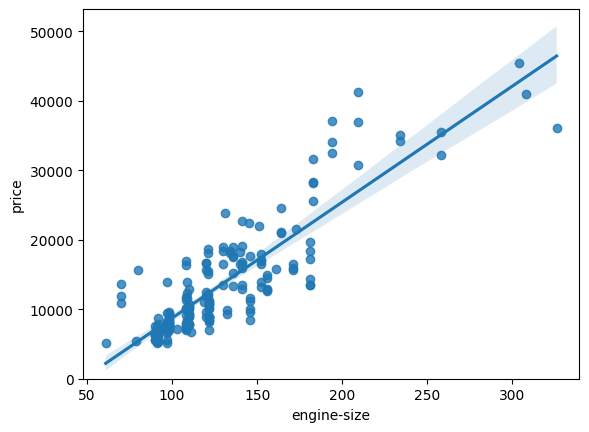

In [20]:
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

We can see that the straight line through the data points is very steep, which shows that there is a strong positive correlation between `engine-size` and `price`.

(0.0, 48172.10380850666)

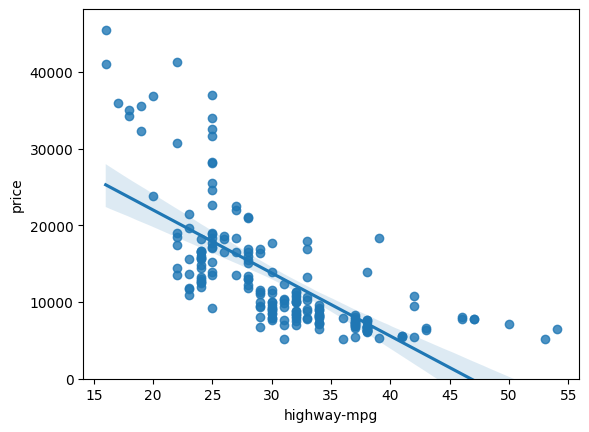

In [21]:
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

As we cn see in this plot, when `highway-mpg` goes up, the `price` goes down, and when `highway-mpg` goes down, the `price` goes up. This indicates an `inverse/negative relationship` between these two variables. `Highway-mpg` could potentially be a predictor of `price`.

# Correlation - Statistics
* One way to measure the strength of the correlation between continuous numeric variable is by using a method called `Pearson Correlation`.
* The `Pearson Correlation` method will give you two values: 
    1. `Correlation Coefficient`: For the coorelation coefficient, a value close to 1 implies a large positive correlation, a value close to -1 implies a large negative correlation, and a value close to 0 implies no correlation between the two variables.
    2. `P-value`: The P-value tells us how certain we are about the correlation between the two variables. Generally, a `P-value less than 0.001` gives us `strong certainty` about the correlation coefficient that we calculated, a value `between 0.001 and 0.05` gives us `moderate certainty`, a `P-value between 0.05 and 0.1` gives us `weak certainty` and a `P-value larger than 0.1` will give us `no certainty` about the correlation coefficient that we calculated.

df['horsepower'] = df['horsepower'].astype(float)
mean_hp = df['horsepower'].mean()
df['horsepower'].replace(np.nan, mean_hp, inplace=True)
df['horsepower'].notnull().sum()

In [22]:
df.dropna(subset=['price'], axis=0,inplace=True)

In [23]:
pears_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
pears_coef, p_value

ValueError: array must not contain infs or NaNs

* Since the `pearson-coefficient` is close to `1` hence their is a strong positive correlation between `horsepower` and `price` the `P-value` is `<0.001`, this means that we are `certain` about the `positive correlation` between `horsepower` and `price`.

# Correlation Heatmap
* A `correlation heatmap` is a `heatmap` that shows the `correlation matrix`.
* Taking all variables into account, we can calculate the `correlation` between every pair of variables, `correlation` between pairs of variables is calculated using three methods:
    1. `Pearson`: Standard correlation coefficient
    2. `Kendall`: Kendall Tau correlation coefficient
    3. `Spearman`: Spearman rank correlation coefficient
* Each of these methods have their own strengths and weaknesses, and can be used in different scenarios.
* To build a `correlation heatmap`, we first need to calculate the `correlation matrix` that contains the `correlation` between each pair of variables.
* We can then plot the `correlation matrix` using a `heatmap`.

In [24]:
#First let us check about the missing values in categorical columns
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-L/100Km         0
highway-mpg          0
price                0
price-binned         0
dtype: int64

As we can see there are some missing values in categorical columns. We have to handle these columns.
* As we had learnied that we can change the data type of the columns. By this is only possible if data filled is in other data-type as in case of `normalized-losses`, `bore`, `stroke`, `horsepower`, `peak-rpm` and `price` columns.
* But in case of `make` column, we have to replace the missing values with the most frequent value in the column.
* We can use `value_counts()` method to find the most frequent value in the column.
* We can use `replace()` method to replace the missing values with the most frequent value in the column.

In [25]:
#Let's first list of columns with pure object type values
cat_cols = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'price-binned']
cat_cols

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system',
 'price-binned']

In [26]:
#Making a list of columns with numerical type values
num_cols = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-L/100Km', 'highway-mpg', 'price']
num_cols

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-L/100Km',
 'highway-mpg',
 'price']

Now, first we have to fill missing data in categorical columns. For this we have `SimpleImputer` class in `sklearn.impute` module.
* `SimpleImputer` class provides basic strategies for imputing missing values, either using the `mean`, `median` or `most frequent` value of the column in which the missing values are located.
* We can use `SimpleImputer` class to replace the missing values with the most frequent value in the column.

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(df[cat_cols])
df[cat_cols] = imputer.transform(df[cat_cols])

In [28]:
# Let's check if there are any missing values in the categorical columns
def fill_na(col):
    df[col] = df[col].astype(float)
    mean = df[col].mean()
    df[col].replace(np.nan, mean, inplace=True)
    return df[col]

In [29]:
for col in num_cols:
    col = fill_na(col)

In [30]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-L/100Km         0
highway-mpg          0
price                0
price-binned         0
dtype: int64

* Now for plotting heatmap chart first we have to encode all the catagorical columns into numerical data. 
* For this we can use `encoders` from `sklearn` library.
* There are basically three types of encoders:
    1. `Label Encoder`: It is used to encode the catagorical data into numerical data when .
    2. `One Hot Encoder`: It is used to encode the catagorical data into numerical data and create dummy variables for each catagory.
    3. `Ordinal Encoders`: It is used to encode the catagorical data into numerical data when the catagories have some order.

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

In [32]:
df.dtypes

Unnamed: 0.1           int64
Unnamed: 0             int64
symboling            float64
normalized-losses    float64
make                   int32
fuel-type              int32
aspiration             int32
num-of-doors           int32
body-style             int32
drive-wheels           int32
engine-location        int32
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type            int32
num-of-cylinders       int32
engine-size          float64
fuel-system            int32
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-L/100Km         float64
highway-mpg          float64
price                float64
price-binned           int32
dtype: object

<Axes: >

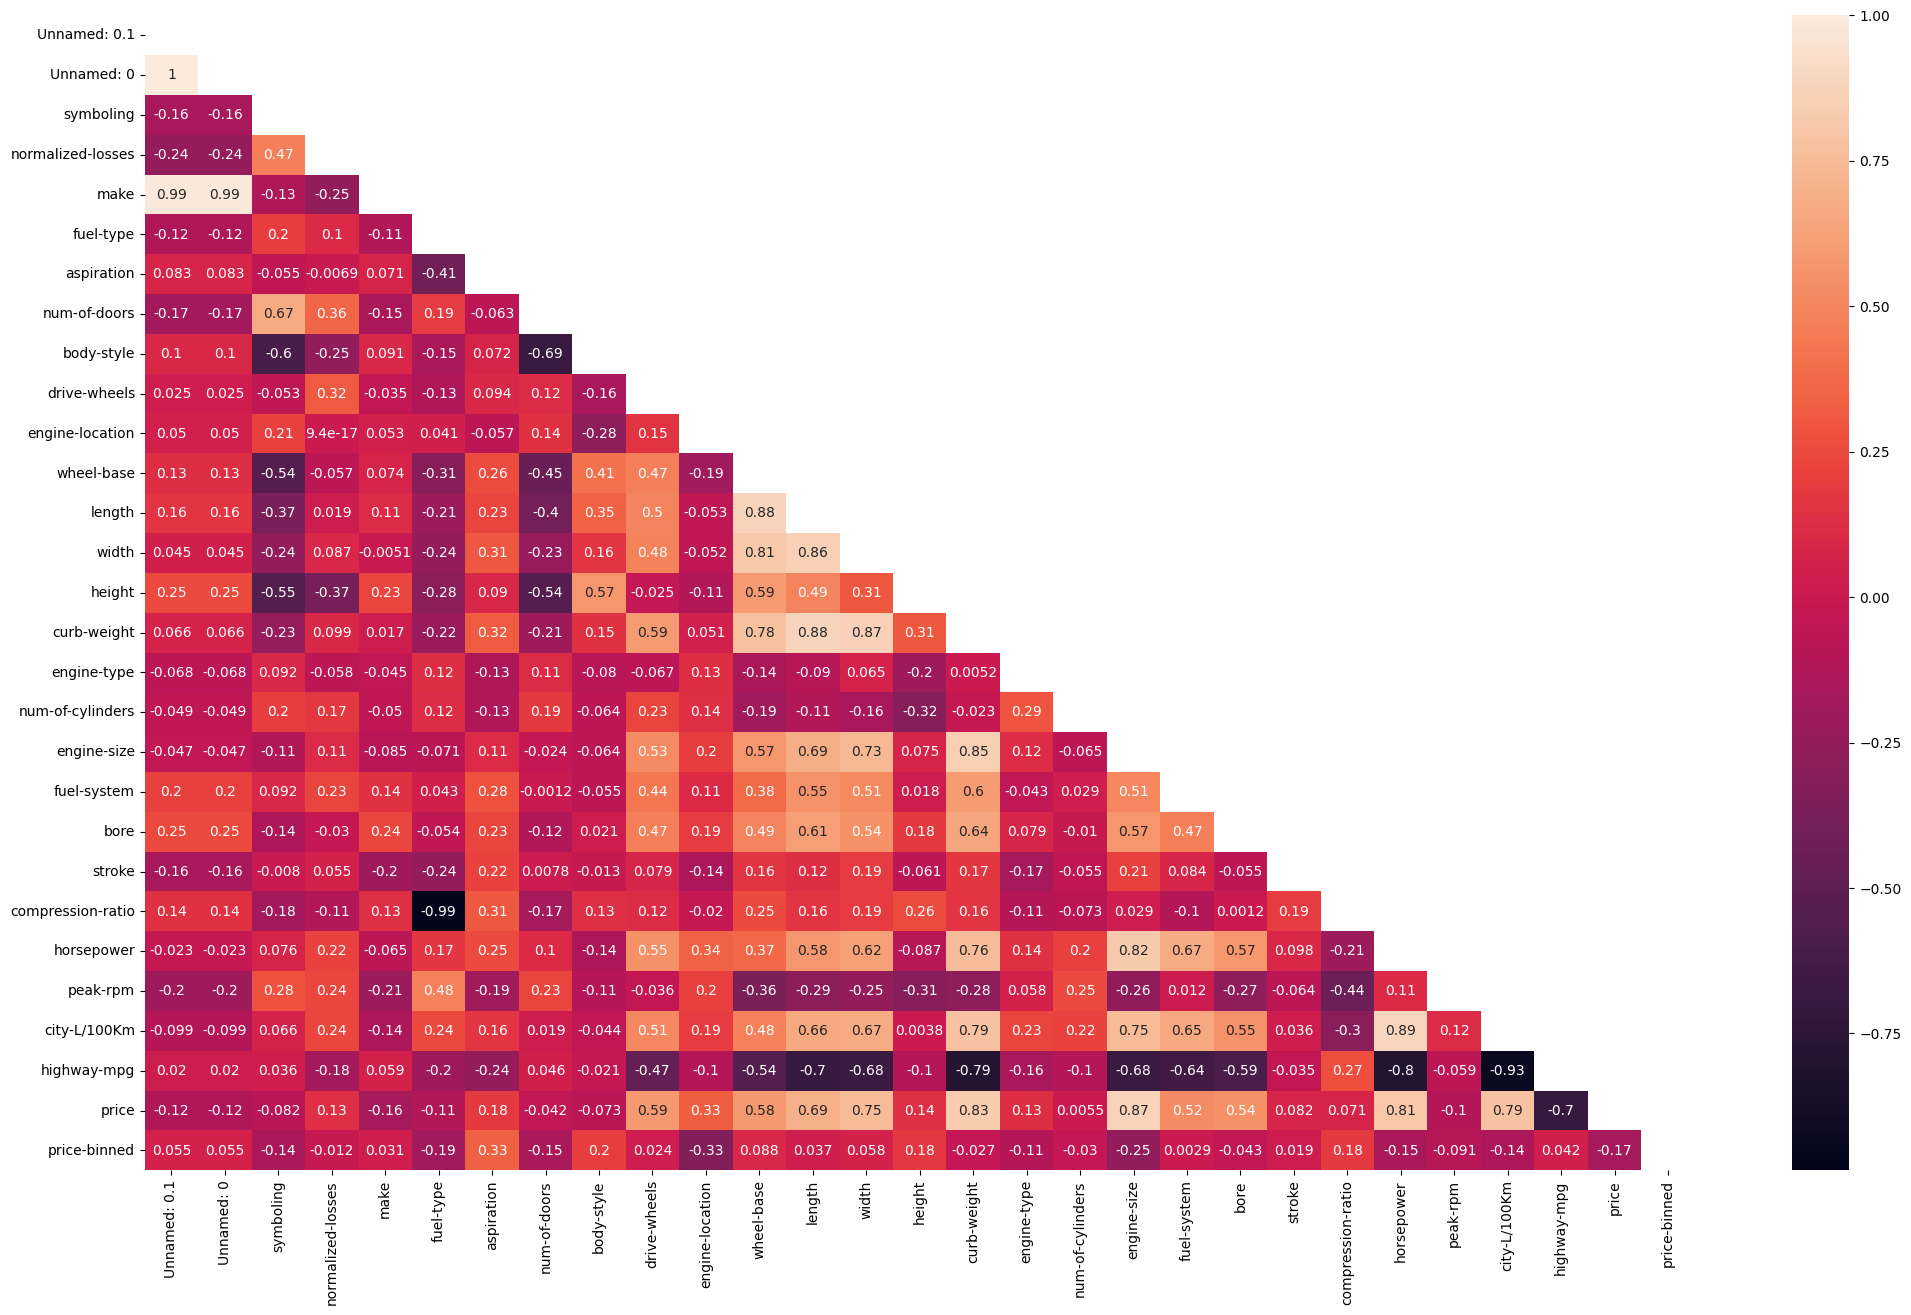

In [33]:
# Now we are ready to generate heatmap
plt.figure(figsize=(25,15))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, mask=matrix)

In [34]:
df.to_csv('Data/automobile_cleaned.csv')